**_Section 10.0:_** Load packages

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
from sklearn import dummy, metrics

%matplotlib inline

/Users/dat-44pt/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### _Section 10.1_
```diff
+ The following section serves as a brief refresher regarding precision, recall, and how the two interact.
```
### Cost Benefit Questions
Take our example where we built a model to reduce user churn:
1. How would you rephrase the business problem if your model was optimizing toward _precision_?  
i.e., How might the model behave differently, and what effect would it have?
2. How would you rephrase the business problem if your model was optimizing toward _recall_?
3. What would the most ideal model look like in this case?

#### Answers:

1. If my model were optimized toward precision, I'd be minimizing the number of false positives: users who are targeted in the campaign but are not retained.
2. If my model were optimized toward recall, I'd be minimizing the number of false negatives, or making sure that users who could have been retained, were retained.
3. The ideal model would be most optimized, in this case, towards recall (as there's the largest business gain).

### _Section 10.2_
```diff
+ The following section provides an opportunity for the student to explain the effect of particular variables on our model by plotting the predictions of our model against the possible range of values for our variable-of-interest.
```
### Visualizing models over variables
- See dataframe duplication example in [class_notes.ipynb](./class_notes.ipynb)

In [2]:
df = pd.read_csv('./datasets/flight_delays.csv')
df = df.loc[df.DEP_DEL15.notnull()].copy() # See example from class_notes.ipynb

df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,Unnamed: 15
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,900,855.0,0.0,NaN
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,900,856.0,0.0,NaN
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,1230,1226.0,0.0,NaN
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,1220,1214.0,0.0,NaN
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,1217302,32134,1305,1754.0,1.0,NaN


In [3]:
df = df[df.DEP_DEL15.notnull()] # drop null values for 'DEP_DEL15' column
df = df.join(pd.get_dummies(df['CARRIER'], prefix='carrier')) # create new columns of dummy variables
df = df.join(pd.get_dummies(df['DAY_OF_WEEK'], prefix='dow'))

model = lm.LogisticRegression()

features = [i for i in df.columns if 'dow_' in i]
features += ['CRS_DEP_TIME']

df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,...,carrier_US,carrier_VX,carrier_WN,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,dow_7
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,...,0,0,0,0,0,0,1,0,0,0
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,...,0,0,0,0,0,0,1,0,0,0
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,...,0,0,0,0,0,0,1,0,0,0
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,...,0,0,0,0,0,0,1,0,0,0
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,...,0,0,0,0,0,0,1,0,0,0


In [4]:
df.shape

(458311, 37)

In [5]:
model.fit(df[features[1:]], df['DEP_DEL15'])

df['probability'] = model.predict_proba(df[features[1:]])[:,1]
# 'predict_proba' returns 'T': the probability of the sample for each class in the model 
# (n elements long, where n = # of class labels)

In [6]:
features[1:]

['dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'dow_7', 'CRS_DEP_TIME']

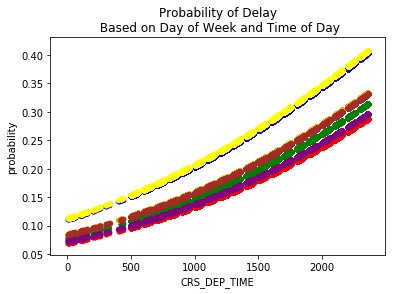

In [7]:
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'yellow']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color=c, ax=ax)

ax.set(title='Probability of Delay\n Based on Day of Week and Time of Day')

plt.show()

### Other Answers: visualizing Airline performance over time

In [8]:
features = [i for i in df.columns if 'carrier_' in i]
features += ['CRS_DEP_TIME']
features

['carrier_AA',
 'carrier_AS',
 'carrier_B6',
 'carrier_DL',
 'carrier_EV',
 'carrier_F9',
 'carrier_HA',
 'carrier_MQ',
 'carrier_NK',
 'carrier_OO',
 'carrier_UA',
 'carrier_US',
 'carrier_VX',
 'carrier_WN',
 'CRS_DEP_TIME']

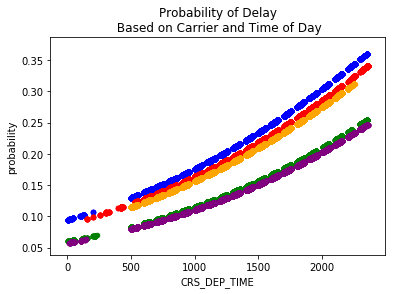

In [9]:
model = lm.LogisticRegression()
model.fit(df[features[1:]], df['DEP_DEL15'])

df['probability'] = model.predict_proba(df[features[1:]])[:,1]

ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color=c, ax=ax)

ax.set(title='Probability of Delay\n Based on Carrier and Time of Day')

plt.show()

### Other Answers: visualizing the inverse

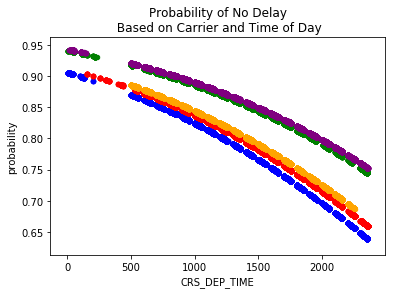

In [10]:
model = lm.LogisticRegression()
model.fit(df[features[1:]], df['DEP_DEL15'])

df['probability'] = model.predict_proba(df[features[1:]])[:,0]

ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple', 'orange']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='CRS_DEP_TIME', y='probability', kind='scatter', color=c, ax=ax)

ax.set(title='Probability of No Delay\n Based on Carrier and Time of Day')

plt.show()

### _Section 10.3_
```diff
+ The following section provides an opportunity for the student to try visualizing the effect of our model against a baseline, which provides a 'standard' for us to compare our results against, and helps us track the progress of our results.
```
### Visualizing Performance Against Baseline
#### Visualizing AUC and comparing Models

_DummyClassifier_ is a classifier that makes predictions using simple rules.

This classifier is useful as a simple baseline to compare with other (real) classifiers. _Do not_ use it for real problems!

In [11]:
model0 = dummy.DummyClassifier()
model0.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_0'] = model0.predict_proba(df[features[1:]])[:,1]

model1 = lm.LogisticRegression()
model.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_1'] = model.predict_proba(df[features[1:]])[:,1]

In [12]:
df.shape

(458311, 40)

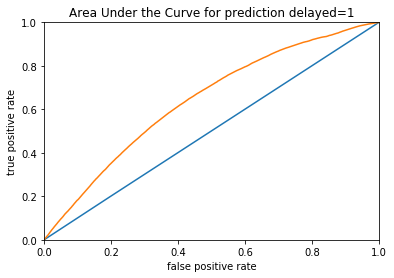

In [13]:
ax = plt.subplot(111)
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_0)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_1)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for prediction delayed=1', 
       xlabel='false positive rate', ylabel='true positive rate', xlim=(0, 1), ylim=(0, 1))

plt.show()

#### Visualizing Precision / Recall (with cleaner code)

In [14]:
model0 = dummy.DummyClassifier()
model0.fit(df[features[1:]], df.DEP_DEL15)
df['probability_0'] = model0.predict_proba(df[features[1:]])[:,1]

model = lm.LogisticRegression()
model.fit(df[features[1:]], df.DEP_DEL15)
df['probability_1'] = model.predict_proba(df[features[1:]])[:,1]

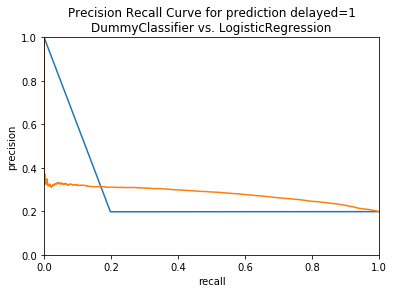

In [15]:
ax = plt.subplot(111)
for i in range(2):
    vals = metrics.precision_recall_curve(df.DEP_DEL15, df['probability_' + str(i)])
    ax.plot(vals[1], vals[0])

ax.set(title='Precision Recall Curve for prediction delayed=1\nDummyClassifier vs. LogisticRegression', 
       xlabel='recall', ylabel='precision', xlim=(0, 1), ylim=(0, 1))

plt.show()

Above we can see that the logistic regression model outperforms the dummy classifier by obtaining a greater precision and recall overall.

### _Section 10.4_
```diff
+ The final section provides an opportunity for the student to try out a variety of methods learned over the last several class sessions.
```
### Project Practice

In [16]:
# Example: How to check the significance of individual variables
features = [i for i in df.columns if 'dow_' in i]

logit_model=sm.Logit(df['DEP_DEL15'],df[features]) 
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.495591
         Iterations 6
                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: DEP_DEL15        Pseudo R-squared: 0.005      
Date:               2018-04-19 20:57 AIC:              454283.8328
No. Observations:   458311           BIC:              454361.0799
Df Model:           6                Log-Likelihood:   -2.2713e+05
Df Residuals:       458304           LL-Null:          -2.2839e+05
Converged:          1.0000           Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
dow_1    -1.1734     0.0095   -123.8196   0.0000   -1.1920   -1.1549
dow_2    -1.5269     0.0109   -139.9420   0.0000   -1.5482   -1.5055
dow_3    -1.6599     0.0111   -150.0046   0